# Прогнозирование количества страховых выплат<br>с использованием шифрованных данных

Страховая компания располагает различными сведениями о клиенте. Это персональные данные клиента, информация о его здоровье, финансовом состоянии, о трудовой деятельности, контактные данные и история страхования. Страховая компания обязана защищать сведения о своих клиентах и соблюдать конфиденциальность при работе с данными в соответствии с действующими нормативно-правовыми актами и внутренними стандартами безопасности.

Чтобы защитить персональную информацию, в контексте работы с большими данными традиционно используются различные методы анонимизации и маскирования. Для сохранения конфиденциальности методы обучения обычно используются с использованием криптографии и статистических приёмов.

Достаточно надёжное маскирование информации может быть обеспечено использованием некоторых аналитических преобразований для шифрования, в частности, методов алгебры матриц. Например, можно умножать вектор табличных данных об объекте на специально подобранную матрицу. Такая матрица будет являться ключом, поэтому её размер
и содержание должны храниться в секрете.

После процедуры шифрования вместо вектора со сведениями об объекте получится вектор, компоненты которого будут представлять собой зашифрованные значения. Дешифрование осуществляется с использованием того же правила умножения матрицы на вектор, только в качестве основы берётся матрица, обратная той, с помощью которой осуществлялось шифрование.

В нашем распоряжении находятся данные о клиентах, обслуживающихся в страховой компании. Для каждого клиента доступны персональные данные (поло-возрастная информация, сведения о членах семьи и заработной плате) и данные о количестве страховых выплат.

Все сведения открыты. Поэтому необходимо перед построением модели данные зашифровать.

**Цель проекта:** построить модель, прогнозирующую количество страховых выплат, с использованием шифрованных данных.

**Задачи проекта:**
- выполнить предобработку данных (при необходимости);
- провести описательный анализ данных;
- разбить данные на тренировочную и тестовую выборку;
- выбрать алгоритмы и построить модели;
- выбрать метрики качества моделей и оценить их значения;
- сравнить качество моделей, построенных с использованием открытых и замаскированных данных.

**Комментарий к процедуре маскирования данных:**

- Для маскирования значений признаков используем шифрование с использованием аналитического преобразования &mdash; умножения матрицы признаков на обратимую матрицу-ключ.
- Среди алгоритмов обучения выберем линейную регрессию.
- В качестве основы для сравнения построенных моделей используем коэффициент детерминации.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-предварительные-настройки" data-toc-modified-id="Импорт-библиотек-и-предварительные-настройки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и предварительные настройки</a></span></li><li><span><a href="#Чтение-файла-и-загрузка-данных" data-toc-modified-id="Чтение-файла-и-загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла и загрузка данных</a></span></li><li><span><a href="#Общая-характеристика-набора-данных" data-toc-modified-id="Общая-характеристика-набора-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общая характеристика набора данных</a></span></li></ul></li><li><span><a href="#Понимание-данных" data-toc-modified-id="Понимание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Понимание данных</a></span></li><li><span><a href="#Описательный-анализ-данных" data-toc-modified-id="Описательный-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Описательный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Пол" data-toc-modified-id="Пол-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Пол</a></span></li><li><span><a href="#Возраст" data-toc-modified-id="Возраст-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Возраст</a></span></li><li><span><a href="#Заработная-плата" data-toc-modified-id="Заработная-плата-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Заработная плата</a></span></li><li><span><a href="#Количество-членов-семьи" data-toc-modified-id="Количество-членов-семьи-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Количество членов семьи</a></span></li><li><span><a href="#Количество-страховых-выплат" data-toc-modified-id="Количество-страховых-выплат-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Количество страховых выплат</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Оценка-модели" data-toc-modified-id="Оценка-модели-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оценка модели</a></span></li></ul></li><li><span><a href="#Построение-модели-на-шифрованных-данных" data-toc-modified-id="Построение-модели-на-шифрованных-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение модели на шифрованных данных</a></span><ul class="toc-item"><li><span><a href="#Обоснование-возможности-шифрования-при-построении-модели" data-toc-modified-id="Обоснование-возможности-шифрования-при-построении-модели-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Обоснование возможности шифрования при построении модели</a></span></li><li><span><a href="#Алгоритм-преобразования-данных" data-toc-modified-id="Алгоритм-преобразования-данных-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Алгоритм преобразования данных</a></span></li><li><span><a href="#Задание-матрицы-для-шифрования" data-toc-modified-id="Задание-матрицы-для-шифрования-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Задание матрицы для шифрования</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Шифрование-признаков" data-toc-modified-id="Шифрование-признаков-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Шифрование признаков</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Оценка-модели" data-toc-modified-id="Оценка-модели-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Оценка модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

Внимание! Для корректной работы кода в ячейках рекомендуется предварительно установить следующие библиотеки:

In [ ]:
!pip install -U pandas -q

## Обзор данных

### Импорт библиотек и предварительные настройки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
warnings.filterwarnings('ignore')

RANDOM_STATE = 1

### Чтение файла и загрузка данных

Все данные хранятся в одном файле.
<br> Файл данных `insurance.csv` имеет формат `CSV`.

In [3]:
pth1 = r'C:\Users\Георгий\Documents\DS_projects\insurance.csv'
pth2 = '/datasets/insurance.csv'
pth3 = '/content/insurance.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
elif os.path.exists(pth3):
    data = pd.read_csv(pth3)
else:
    print('Something is wrong')

Убедимся, что данные подгрузились верно, без ошибок.

Для этого выведем первые 10 строк и последние 10 строк набора данных.

In [4]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
data.tail(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4990,0,22.0,56800.0,1,0
4991,0,21.0,38300.0,3,0
4992,0,45.0,54600.0,0,1
4993,1,32.0,36000.0,1,0
4994,1,26.0,51400.0,0,0
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


### Общая характеристика набора данных

Размер набора данных:

In [6]:
data.shape

(5000, 5)

Уникальные наименования признаков:

In [7]:
data.columns.sort_values().tolist()

['Возраст', 'Зарплата', 'Пол', 'Страховые выплаты', 'Члены семьи']

Количество элементов данных:

In [8]:
data.size

25000

Типы данных набора данных:

In [9]:
data.dtypes.value_counts()

int64      3
float64    2
Name: count, dtype: int64

Пропущенные значения в данных:

In [10]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

**Промежуточный вывод**

* Набор данных содержит 5 уникальных признаков и 5000 записей.
* Всего: 25 000 элементов данных.
* Набор данных содержит данные следующего типа:
    - вещественный — 3 признаков,
    - целочисленный — 2 признак.
* Все признаки содержат значения (не являются пустыми).
* Пропущенных значений в наборе данных нет.

## Понимание данных

***Персональные данные клиента***

> **Персональные данные клиента** &mdash; это любая информация, которая относится к конкретному человеку и позволяет однозначно его идентифицировать.

К персональным данным относятся сведения о поле и возрасте клиента, количестве членов его семьи, уровне доходов.

`Пол`
<br> Признак является категориальным, бинарным.
<br> Шкала измерения признака: дихотомическая шкала.

`Возраст` &mdash; возраст клиента (лет)
<br> Признак является количественным, непрерывным.
<br> Шкала измерения признака: интервальная шкала.

`Зарплата` &mdash; уровень заработной платы (у. е.)
<br> Признак является количественным, непрерывным.
<br> Шкала измерения признака: шкала отношений.

`Члены семьи` &mdash; количество членов семьи
<br> Признак является количественным, дискретным.
<br> Шкала измерения признака: абсолютная шкала.

***Страховые данные клиента***

>**Страховая выплата** &mdash; денежная сумма, которая выплачивается страховщиком застрахованному лицу при наступлении страхового случая.

Произведённые страховщиком страховые выплаты по одному страховому случаю рассматриваются как одна страховая выплата.

Количество страховых выплат &mdash; количество произведённых страховщиком страховых выплат при наступлении страховых случаев; количество зафиксированных обращений за страховым возмещением по договорам страхования.

`Страховые выплаты` &mdash; количество страховых выплат &mdash; целевой признак
<br> Признак является количественным, дискретным.
<br> Шкала измерения признака: абсолютная шкала.

## Описательный анализ данных

Предварительно зададим функцию, рассчитывающую описательные статистики.

In [11]:
def descriptive_statistics(values, label):
    '''
    Описательная статистика переменной, измеряемой в количественной шкале.

    Принимает значения признака и название признака.
    Возвращает DataFrame с набором статистик.

    '''

    df = pd.DataFrame([
        values.count(),
        len(values.unique()),
        values.min(),
        values.median() - 1.5 * (values.quantile(q=.75) -
                                 values.quantile(q=.25)),
        values.quantile(q=.25).round(2),
        (values.mode()).to_list(),
        values.median().round(2),
        values.mean().round(2),
        values.quantile(q=.75).round(2),
        values.median() + 1.5 * (values.quantile(q=.75) -
                                 values.quantile(q=.25)),
        values.max(),
        values.max() - values.min(),
        values.quantile(q=.75) - values.quantile(q=.25)
    ],
        index=['кол-во значений', 'кол-во уникальных', 'мин.',
               '-1.5IQR', '25 %', 'мода', 'медиана',
               'среднее ариф.', '75 %', '+1.5IQR', 'макс.',
               'размах', 'межквартильный размах'],
        columns=[label])

    return df

### Пол

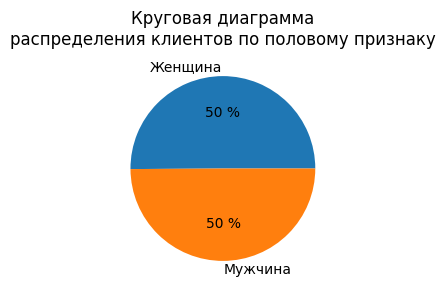

In [12]:
labels = 'Женщина', 'Мужчина'
plt.figure(figsize=(3, 3))
plt.pie(data['Пол'].value_counts(), labels=labels, autopct='%.0f %%')
plt.title('Круговая диаграмма\nраспределения клиентов по половому признаку')
plt.show()

In [13]:
pd.DataFrame(data['Пол'].value_counts()).T.rename(
    columns={0: 'Женщина', 1: 'Мужчина'}, index={'Пол': 'Кол-во клиентов'})

Пол,Женщина,Мужчина
count,2505,2495


- Значения определены для всех записей.
- Мода &mdash; женщины, её частота &mdash; 2505.
- 2505 клиентов (50 %) являются женщинами, 2495 клиентов (50 %) являются мужчинами. Количество клиентов разного пола распределено в отношении 1 : 1.

### Возраст

In [14]:
descriptive_statistics(data['Возраст'], 'Возраст')

,Возраст
кол-во значений,5000
кол-во уникальных,46
мин.,18.0
-1.5IQR,10.5
25 %,24.0
мода,[19.0]
медиана,30.0
среднее ариф.,30.95
75 %,37.0
+1.5IQR,49.5


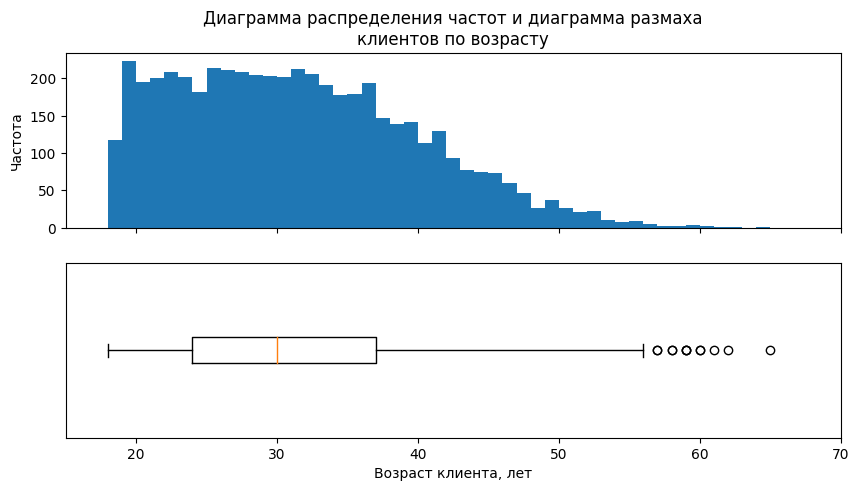

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.set_title('Диаграмма распределения частот и диаграмма размаха' +
              '\nклиентов по возрасту')
ax1.hist(data['Возраст'], bins=[n for n in range(66)])
ax1.set_xlim(15, 70)
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('Частота')
ax2.boxplot(data['Возраст'], vert=False)
ax2.set_xlim(15, 70)
ax2.tick_params(left=False, labelleft=False)
ax2.set_xlabel('Возраст клиента, лет')
plt.show()

- Значения определены для всех записей.
- Значения определены с точностью до 1.
- Для 5000 записей встречается 46 различных уникальных значений.
- Минимальное значение &mdash; 18 лет, максимальное значение &mdash; 65 лет.
- Мода &mdash; 19 лет, медиана &mdash; 30 лет.
- Распределение унимодальное, несимметричное. Смещено влево, с длинным "хвостом" справа.
- Половина всех клиентов достигло возраста 24&ndash;37 лет.
- Практически все клиенты не старше 50 лет.

### Заработная плата

In [16]:
descriptive_statistics(data['Зарплата'], 'Зарплата, у. е.')

,"Зарплата, у. е."
кол-во значений,5000
кол-во уникальных,524
мин.,5300.0
-1.5IQR,20250.0
25 %,33300.0
мода,[45800.0]
медиана,40200.0
среднее ариф.,39916.36
75 %,46600.0
+1.5IQR,60150.0


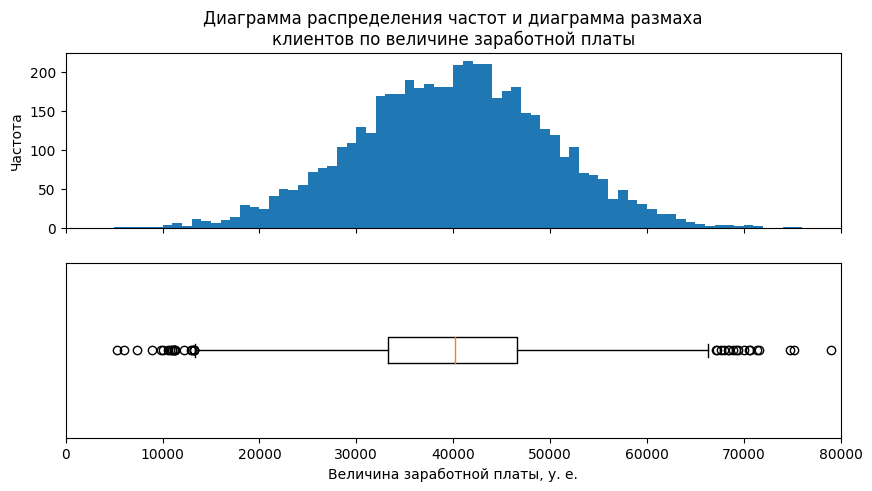

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.set_title('Диаграмма распределения частот и диаграмма размаха' +
              '\nклиентов по величине заработной платы')
ax1.hist(data['Зарплата'], bins=[1000*n for n in range(79)])
ax1.set_xlim(0, 80000)
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('Частота')
ax2.boxplot(data['Зарплата'], vert=False)
ax2.set_xlim(0, 80000)
ax2.tick_params(left=False, labelleft=False)
ax2.set_xlabel('Величина заработной платы, у. е.')
plt.show()

- Значения определены для всех записей.
- Значения определены с точностью до 100.
- Для 5000 записей встречается 524 различных уникальных значений.
- Минимальное значение &mdash; 5300 у. е., максимальное значение &mdash; 79 000 у. е.
- Медиана &mdash; 40 200 у. е., среднее арифметическое &mdash; 39 916 у. е.
- Распределение унимодальное, симметричное.
- Заработная плата половины всех пользователей составляет 33 000&ndash;46 600 у. е.

### Количество членов семьи

In [18]:
descriptive_statistics(data['Члены семьи'], 'Количество членов семьи')

,Количество членов семьи
кол-во значений,5000
кол-во уникальных,7
мин.,0
-1.5IQR,-2.0
25 %,0.0
мода,[1]
медиана,1.0
среднее ариф.,1.19
75 %,2.0
+1.5IQR,4.0


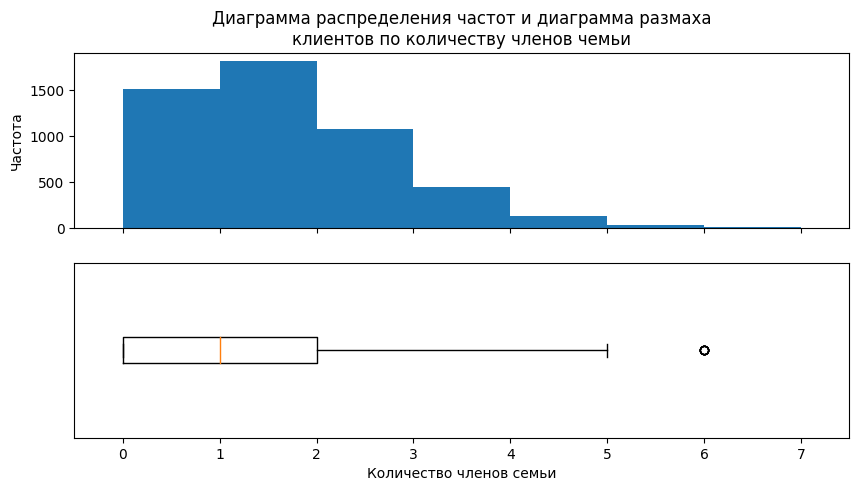

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.set_title('Диаграмма распределения частот и диаграмма размаха' +
              '\nклиентов по количеству членов чемьи')
ax1.hist(data['Члены семьи'], bins=[n for n in range(8)])
ax1.set_xlim(-0.5, 7.5)
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('Частота')
ax2.boxplot(data['Члены семьи'], vert=False)
ax2.set_xlim(-0.5, 7.5)
ax2.tick_params(left=False, labelleft=False)
ax2.set_xlabel('Количество членов семьи')
plt.show()

- Значения определены не для всех записей.
- Значения определены с точностью до 1.
- Для 5000 записей встречается 7 различных уникальных значений.
- Минимальное значение &mdash; 0, максимальное значение &mdash; 6.
- Мода &mdash; 1, медиана &mdash; 1.
- Распределение унимодальное, несимметричное. Смещено влево.
- Половина всех клиентов в семье имеют ещё не более 2 членов.

### Количество страховых выплат

In [20]:
descriptive_statistics(data['Страховые выплаты'], 'Страховые выплаты')

,Страховые выплаты
кол-во значений,5000
кол-во уникальных,6
мин.,0
-1.5IQR,0.0
25 %,0.0
мода,[0]
медиана,0.0
среднее ариф.,0.15
75 %,0.0
+1.5IQR,0.0


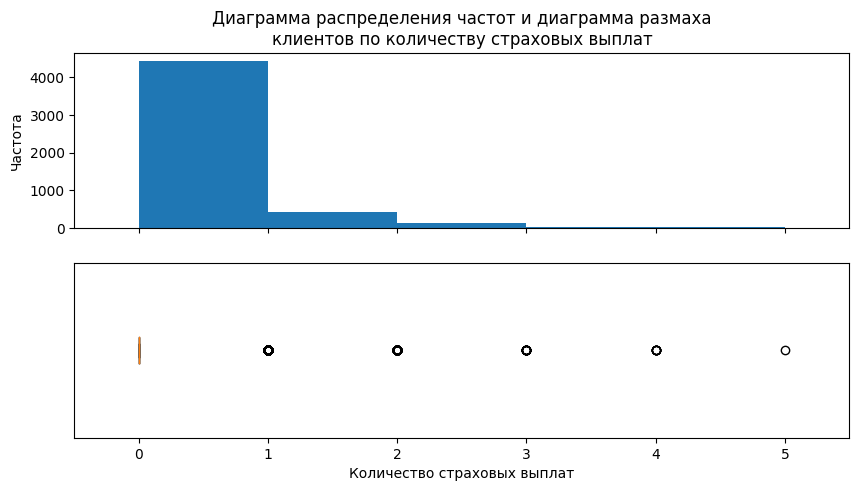

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
ax1.set_title('Диаграмма распределения частот и диаграмма размаха' +
              '\nклиентов по количеству страховых выплат')
ax1.hist(data['Страховые выплаты'], bins=[n for n in range(6)])
ax1.set_xlim(-0.5, 5.5)
ax1.tick_params(labelbottom=False)
ax1.set_ylabel('Частота')
ax2.boxplot(data['Страховые выплаты'], vert=False)
ax2.set_xlim(-0.5, 5.5)
ax2.tick_params(left=False, labelleft=False)
ax2.set_xlabel('Количество страховых выплат')
plt.show()

In [22]:
df = pd.DataFrame(
    {'Без выплат': data[data['Страховые выплаты'] == 0].shape[0],
     'С выплатой': data[data['Страховые выплаты'] > 0].shape[0]},
    index = ['Количество клиентов']
).T
df

,Количество клиентов
Без выплат,4436
С выплатой,564


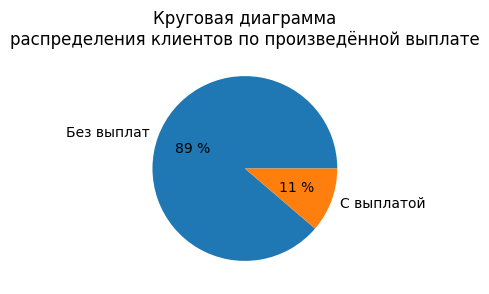

In [23]:
labels = 'Без выплат', 'С выплатой'
plt.figure(figsize=(3, 3))
plt.pie(df['Количество клиентов'], labels=labels, autopct='%.0f %%')
plt.title('Круговая диаграмма\nраспределения клиентов по произведённой выплате')
plt.show()

In [24]:
df = data[data['Страховые выплаты'] > 0] \
        .groupby('Страховые выплаты').apply('count')['Пол']
df = pd.DataFrame(df).rename({'Пол': 'Количество клиентов'}, axis=1)
df.T

Страховые выплаты,1,2,3,4,5
Количество клиентов,423,115,18,7,1


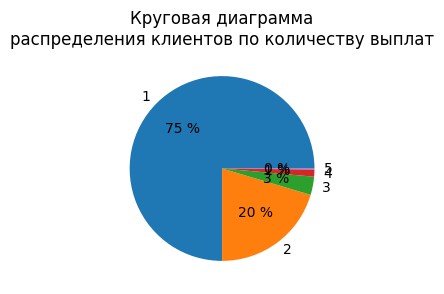

In [25]:
labels = [1, 2, 3, 4, 5]
plt.figure(figsize=(3, 3))
plt.pie(df['Количество клиентов'], labels=labels, autopct='%.0f %%')
plt.title('Круговая диаграмма\nраспределения клиентов по количеству выплат')
plt.show()

- Значения определены для всех записей.
- Значения определены с точностью до 1.
- Для 5000 записей встречается 6 различных уникальных значений.
- Минимальное значение &mdash; 0, максимальное значение &mdash; 5.
- Мода &mdash; 0, медиана &mdash; 0.
- Распределение экспоненциальное, убывающее.
- Практически все клиенты (89 %) не получали выплаты.
- Из 11 % клиентов, которые получили страховые выплаты, три четверти получили по 1 выплате, пятая часть получила 2 выплаты, остальные &mdash; от 3 до 5 выплат.

## Построение модели

### Разделение данных на выборки

Выделим из данных целевой признак `Страховые выплаты`.

In [26]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

Поскольку отдельной тестовой выборки нет, разделим данные на тренировочную и тестовую выборки в отношении 3 : 1.

In [27]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

Посмотрим, какие выборки получились после разделения.

In [28]:
features_train.shape

(3750, 4)

In [29]:
features_test.shape

(1250, 4)

### Масштабирование признаков

У каждого количественного признака значения разного порядка. Чтобы все признаки имели одинаковую значимость для алгоритмов, выполним процедуру масштабирования значений признаков.

In [30]:
columns = ['Зарплата', 'Возраст']

scaler = StandardScaler()
scaler.fit(features_train[columns])

features_train[columns] = scaler.transform(features_train[columns])
features_test[columns] = scaler.transform(features_test[columns])

In [31]:
pd.concat([features_train, features_test])

,Пол,Возраст,Зарплата,Члены семьи
3186,1,0.583301,-0.060941,4
632,0,-0.118795,-1.382839,3
577,0,-0.001779,-1.554383,2
2406,0,0.700317,-0.293030,3
4686,0,-0.703874,-0.525119,1
...,...,...,...,...
3015,1,-0.001779,-0.434301,0
1891,1,-0.118795,3.087398,0
2773,1,-0.820890,-1.403021,2
3803,1,-0.937906,0.050059,1


### Обучение моделей

Поскольку целевой признак `Страховые выплаты` &mdash; количественный (дискретный), следовательно, необходимо решить задачу регрессии.

Для построения модели используем алгоритм линейной регрессии.

In [32]:
model = LinearRegression(n_jobs=-1)
model.fit(features_train, target_train)

LinearRegression(n_jobs=-1)

### Оценка модели

Оценку качества обученной модели проведём, рассчитав значение коэффициента детерминации.

In [33]:
predictions = model.predict(features_test)
r2 = r2_score(target_test, predictions)

print('Модель линейной регрессии')
print('Коэффициент детерминации:', r2.round(4))

Модель линейной регрессии
Коэффициент детерминации: 0.3238


## Построение модели на шифрованных данных

### Обоснование возможности шифрования при построении модели

Пусть дана матрица признаков $X$ размером $n \times m$, где $n$ &mdash; количество наблюдений, $m$ &mdash; количество признаков, и вектор целевого признака $y$ размера $n \times 1$.

Тогда уравнение линейной регрессии может быть записано в матричном виде:

$$
y = Xw + w_0,
$$

где $w$ &mdash; вектор параметров (весов) линейной регрессии размером $m \times 1$,
<br>$w_0$ &mdash; вектор случайных ошибок (свободных членов) размером $m \times 1$.

Для краткости записи будем считать, что в матрицу признаков $X$ добавлен признак, тождественно равный единице, тогда можно полагать, что его вес равен значению свободного члена.
<br> Уравнение линейной регрессии примет новый вид:

$$
y = Xw.
$$

Пусть также дана обратимая матрица $A$ &mdash; квадратная матрица, определитель которой не равен нулю. Причём произведение матрицы $A$ и обратной к ней матрицы $A^{-1}$ есть единичная матрица $E$: $AA^{-1}=E$; а произведение данной матрицы на единичную матрицу не приводит к изменению данной матрицы: $AE=EA=A$.

Используя свойство единичной матрицы и ассоциативности произведения матриц, преобразуем уравнение линейной регрессии:

$$
y = XEw,
$$
$$
y = XAA^{-1}w,
$$
$$
y = (XA) (A^{-1}w).
$$

Таким образом, выражение $A^{-1}w$ является новым вектором параметров (обозначим его как $w' = A^{-1}w$), а $XA$ &mdash; это новая матрица признаков, которую можно считать полученной умножением матрицы исходных признаков $X$ на обратимую матрицу $A$.

Тогда уравнение линейной регрессии запишется в новом виде:
$$
y = (XA)w'.
$$

Или, по аналогии с исходным уравнением линейной регрессии,

$$
y = X'w',
$$
где $X' = XA$.

Таким образом, при умножении матрицы признаков $X$ на обратимую матрицу $A$, получается новое уравнение линейной регрессии с новым вектором параметров $w'$. А поскольку матрица $A$ обратима, то можно найти обратную матрицу $A^{-1}$ и вернуться к исходной линейной регрессии с вектором параметров $w$.

Выясним теперь, как умножение матрицы признаков на обратимую матрицу скажется на качестве предсказания модели линейной регрессии.

Предсказания модели линейной регрессии $a = Xw$ ($a$ представляет собой вектор размером $n \times 1$) вычисляются с помощью значений параметров $w$, найденных в результате обучения, в ходе которого решалась задача минимизации среднеквадратического отклонения предсказаний от реальных значений целевого признака, то есть задача:

$$
w = \arg\min_w MSE(Xw, y).
$$

Значения параметров линейной регрессии вычисляются по формуле:

$$
w = (X^T X)^{-1} X^T y
$$

При умножении матрицы признаков на обратимую матрицу получится новый вектор параметров:

$$
w' = ((XA)^T (XA))^{-1} (XA)^T y.
$$

Используем транспонирование произведения матриц:

$$
(XA)^T = A^T X^T.
$$

Тогда

$$
w' = (A^T X^T XA)^{-1} A^T X^T y.
$$

Используем ассоциативность произведения матриц и выделим внутри скобок множители:

$$
w' = (A^T (X^T X) A)^{-1} A^T X^T y.
$$

Используем свойство $(A_1 A_2 ... A_r)^{-1} = A_r^{-1} ... A_2^{-1} A_1^{-1}$:

$$
w' = A^{-1} (X^T X)^{-1} (A^T)^{-1} A^T X^T y.
$$

Учтём, что $(A^T)^{-1} A^T = E$:

$$
w' = A^{-1} (X^T X)^{-1} E X^T y.
$$

С учётом свойства единичной матрицы:

$$
w' = A^{-1} (X^T X)^{-1} X^T y.
$$

И, наконец,

$$
w' = A^{-1} w.
$$

Выражение, полученное для нового вектора параметров линейной регрессии, полностью сходится с выражением для нового вектора параметров нового уравнения линейной регрессии, приведённого выше.

Предсказания, полученные с использованием модели новой линейной регрессии:

$$
a' = (XA)w' = (XA) (A^{-1}w) = Xw = a
$$

Предсказания не изменяются при построении модели линейной регрессии не на исходных значениях признаков, а на изменённых с ипользованием обратимой матрицы (и, таким образом, зашифрованных) значениях признаков.

**Вывод**

- Вектор параметров линейной регрессии после умножения матрицы признаков $X$ на обратимую матрицу $A$ представляет собой произведение исходного вектора параметров линейной регрессии $w$ на обратную к обратимой матрицу $A^{-1}$.
- Качество линейной регрессии после умножения матрицы признаков $X$ на обратимую матрицу $A$ не изменяется, предсказания остаются прежними.

### Алгоритм преобразования данных

Обратимая матрица, используемая для шифрования значений признаков, &mdash; это квадратная матрица размера $m \times m$, где $m$ &mdash; количество шифруемых признаков в наборе данных, определитель которой не равен нулю и которая, как следует из названия, имеет обратную матрицу.

Алгоритм построения модели по шифрованным данным:
1. Задать или сгенерировать квадратную матрицу, ранг которой равен количеству шифруемых признаков.
2. Вычислить обратную матрицу, убедиться, что она существует.
3. Зашифровать данные признаков для обучения модели &mdash; выполнить умножение матрицы обучающих значений признаков на обратимую матрицу.
4. Обучить модель на зашифрованных данных.
5. Зашифровать данные признаков для тестирования модели &mdash; выполнить умножение матрицы тестовых значений признаков на обратимую матрицу.
6. Выполнить предсказания для зашифрованной тестовой выборки.
7. Оценить качество предсказательной способности модели.

### Задание матрицы для шифрования

Сгенерируем случайную матрицу и проверим, существует ли для неё обратная матрица.

In [34]:
n = features_train.shape[1]

A = np.random.normal(size=(n, n))
print('Матрица\n', A)

A_1 = np.linalg.inv(A)
print('\nОбратная матрица\n', A_1)

Матрица
 [[-0.12947425 -1.65141596  1.36706949  0.54019946]
 [ 0.10154088  1.44117054  0.06740652 -0.52400499]
 [-0.03706981 -0.51190201 -1.07251064 -1.0544902 ]
 [ 1.104337   -1.14532757  0.49055739  0.90191496]]

Обратная матрица
 [[-0.07546342  0.702237    0.3336666   0.84330474]
 [-0.23123577  0.27065152 -0.30621718 -0.06227509]
 [ 0.6681324   0.7609612  -0.02956274  0.00737219]
 [-0.56464408 -0.93003978 -0.78133435 -0.00691249]]


### Разделение данных на выборки

Снова разделим данные на выборки.

In [35]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

### Шифрование признаков

С помощью матричного умножения матрицы признаков на сгенерированную обратимую матрицу выполним шифрование значений признаков отдельно для обучающей и для тестовой выборок. Сравним полученные значения с исходными.

- Шифрование значений тренировочной выборки:

In [36]:
features_train.head()

,Пол,Возраст,Зарплата,Члены семьи
3186,1,36.0,39400.0,4
632,0,30.0,26300.0,3
577,0,31.0,24600.0,2
2406,0,37.0,37100.0,3
4686,0,25.0,34800.0,1


In [37]:
features_train = features_train @ A
features_train.head()

,0,1,2,3
3186,-1452.606981,-20123.289715,-42251.163262,-41561.630040
632,-968.576641,-13423.223685,-28203.535951,-27746.106558
577,-906.560768,-12550.403773,-26380.691014,-25954.899145
2406,-1368.219751,-18941.677182,-39786.179011,-39138.268709
4686,-1286.386364,-17779.305954,-37321.194534,-36708.457028


- Шифрование значений тестовой выборки:

In [38]:
features_test.head()

,Пол,Возраст,Зарплата,Члены семьи
2764,0,26.0,24500.0,0
4767,0,24.0,32100.0,1
3814,0,33.0,17800.0,3
3499,1,22.0,65100.0,4
2735,1,22.0,41300.0,1


In [39]:
features_test = features_test @ A
features_test.head()

,0,1,2,3
2764,-905.570166,-12504.128770,-26274.758098,-25848.633930
4767,-1186.399430,-16398.611702,-34425.483214,-33860.809494
3814,-653.178673,-9067.733103,-19086.993295,-18784.511907
3499,-2406.722548,-33299.347716,-69815.630388,-68654.692005
2735,-1527.774195,-21112.643935,-44291.348840,-43560.531087


По полученным данным нельзя зрительно восстановить исходные значения признаков. Шифрование выполнено удовлетворительно.

### Обучение модели

Для построения модели используем алгоритм линейной регрессии, применим его к уже зашифрованным значениям.

In [40]:
model = LinearRegression(n_jobs=-1)
model.fit(features_train, target_train)

LinearRegression(n_jobs=-1)

### Оценка модели

Оценку качества обученной модели проведём, рассчитав значение коэффициента детерминации.

In [41]:
predictions = model.predict(features_test)
r2 = r2_score(target_test, predictions)

print('Модель линейной регрессии')
print('Коэффициент детерминации:', r2.round(4))

Модель линейной регрессии
Коэффициент детерминации: 0.3238


## Общий вывод

1. По данным о клиентах страховой компании были обучены модели линейной регрессии: одна &mdash; с использованием открытых данных, вторая &mdash; с использованием маскированных данных. Качество моделей оценено расчётом коэффициента детерминации.
2. Обоснована принципиальная возможность построения модели линейной регрессии с использованием маскированных данных, полученных шифрованием с аналитическим преобразованием &mdash; умножением матрицы признаков на случайно сгенерированную обратимую матрицу.
3. В результате преобразования данных сложно визуально восстановить сведения о клиентах. Применённый способ шифрования доказывает свою эффективность.
4. Маскирование значений признаков не приводит к ухудшению моделей машинного обучения. Обе обученные модели линейной регрессии демонстрируют одинаковое качество: значения коэффициентов детерминации равны с точностью до четвёртой значащей цифры и составляют для обученных моделей 0,3238.